# Speaker Verification

In [ ]:
from test import SpeakerVerification
import yaml
import pandas as pd
import os
import IPython
import tensorflow as tf
import numpy as np

speaker_file = "SpeakerEncoder.yaml"
with open(speaker_file) as file:
    speaker_config_dict = yaml.load(file, Loader=yaml.FullLoader)

speaker_verification = SpeakerVerification(speaker_config_dict)
rel_path = speaker_config_dict["rel_path"]
enroll_folder = speaker_config_dict["enroll_folder"]
verify_folder = speaker_config_dict["verify_folder"]

vox1_meta_path = os.path.join(rel_path, "vox1_meta.csv")
df = pd.read_csv(vox1_meta_path, sep="\t")
df = df[df["Set"]=="test"].reset_index(drop=True)

# 1 - Enrollment
## Select speaker, youtube video and utterances
### Consider only speakers with n_utterances (or more) in one (or more) youtube video

In [ ]:
n_utterances = 5
sel_speakers = speaker_verification.filter_speakers(n_utterances)
if sel_speakers != None:
    df_sel = df[df["VoxCeleb1 ID"].isin(sel_speakers)]
    print(df_sel)

### Let's pick a speaker and check from which of his/her youtube videos we have n_utters or more

In [ ]:
speaker_id = "id10277"
sel_youtube = speaker_verification.filter_youtube(speaker_id, n_utterances)
if sel_youtube != None:
    print(*sel_youtube)

### Now we can pick up a youtube video and get random n_utters

In [ ]:
youtube_id = "znxUWA2QAGs"
utter_files = speaker_verification.random_utterances(speaker_id, 
                                       youtube_id, 
                                       n_utterances)
utter_files

### We can hear the audios

In [ ]:
u_paths = [os.path.join(rel_path, enroll_folder, 
                        speaker_id, youtube_id, u) for u in utter_files]
IPython.display.Audio(u_paths[4])

## Now we can proceed to enroll this speaker's audios
For each utterance,
* feature extraction (mel spectrogram) is performed
* a batch is made applying a sliding window over each transformed utterance
* the batch feeds the speaker encoder
* the embeddings at the output are averaged.

With all the mean embeddings of that user enrollment, the centroid is computed.

In [ ]:
centroid = speaker_verification.enroll(speaker_id=speaker_id,
                                           youtube_id=youtube_id,
                                           utter_files=utter_files,
                                           n_utterances=n_utterances)

# 2 - Speaker Verification
## 2.1 First, another utterance of the same speaker and youtube video
### Select speaker, youtube video and one utterance

In [ ]:
speaker_new = "id10277"
youtube_new = "znxUWA2QAGs"
utter_new = "00005.wav"
utter_path = os.path.join(rel_path, enroll_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

### Let's compute the embeddings of the speaker audio
The utterance to be verified is processed with the same steps as each of the utterances in the enrollment:
* feature extraction (mel spectrogram) is performed
* a batch is made applying a sliding window over the transformed utterance
* the batch feeds the speaker encoder
* the embeddings at the output are averaged.

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new)

In [ ]:
similarity = tf.reduce_sum(embedding_mean * centroid)
print(similarity.numpy())

## 2.2 Then, same speaker but another youtube video

In [ ]:
speaker_new = "id10277"
youtube_new = "tbh20gz_KRA"
utter_new = "00001.wav"
utter_path = os.path.join(rel_path, enroll_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new)
similarity = tf.reduce_sum(embedding_mean * centroid)
print(similarity.numpy())

## 2.3 Now, another speaker

In [ ]:
speaker_new = "id10305"
sel_youtube = speaker_verification.filter_youtube(speaker_new, n_utterances)
if sel_youtube != None:
    print(*sel_youtube)

In [ ]:
youtube_new = "Piw0wvQbpnQ"
utter_new = "00001.wav"
utter_path = os.path.join(rel_path, enroll_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new)
similarity = tf.reduce_sum(embedding_mean * centroid)
print(similarity.numpy())

## 2.4 And another one

In [ ]:
speaker_new = "id10272"
sel_youtube = speaker_verification.filter_youtube(speaker_new, n_utterances)
if sel_youtube != None:
    print(*sel_youtube)

In [ ]:
youtube_new = "ho_r24dlPTQ"
utter_new = "00001.wav"
utter_path = os.path.join(rel_path, enroll_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new)
similarity = tf.reduce_sum(embedding_mean * centroid)
print(similarity.numpy())

## 2.5 And yet another one

In [ ]:
speaker_new = "id10306" # Eva Green
sel_youtube = speaker_verification.filter_youtube(speaker_new, n_utterances)
if sel_youtube != None:
    print(*sel_youtube)

In [ ]:
youtube_new = "tELtXMqh_xg" 
utter_new = "00001.wav"
utter_path = os.path.join(rel_path, enroll_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new)
similarity = tf.reduce_sum(embedding_mean * centroid)
print(similarity.numpy())

## 2.6 And even yet another one

In [ ]:
speaker_new = "id10286"
sel_youtube = speaker_verification.filter_youtube(speaker_new, n_utterances)
if sel_youtube != None:
    print(*sel_youtube)

In [ ]:
youtube_new = "PlJd6NVoigs" 
utter_new = "00001.wav"
utter_path = os.path.join(rel_path, enroll_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new)
similarity = tf.reduce_sum(embedding_mean * centroid)
print("The similarity with {youtube} "{similarity.numpy())

## 2.7 Now let's fix the new speaker and check similarity with all the speakers (including him/her) and youtube videos (see Colab)

In [ ]:
sel_speakers = speaker_verification.filter_speakers(n_utterances)
sel_speakers.sort()
# print(sel_speakers)

for speaker_id in sel_speakers:
    sel_youtube = speaker_verification.filter_youtube(speaker_id, n_utterances)
    for youtube_id in sel_youtube:
        utter_files = speaker_verification.random_utterances(speaker_id, 
                                       youtube_id, 
                                       n_utterances)
        
        centroid = speaker_verification.enroll(speaker_id=speaker_id,
                                               youtube_id=youtube_id,
                                               utter_files=utter_files,
                                               n_utterances=n_utterances, print_mode=False)


## 2.8 Now AJR voice finally!!!!!!
### First, (supposed) speaker verification data

In [ ]:
n_utterances = 4
speaker_new = "id00001"
youtube_new = "verifyeng01" # verifyeng01 verifyesp01
utter_new = "00004.wav" # 00001 00002 00003 (longer) 00004 (even longer)
utter_path = os.path.join(rel_path, verify_folder, 
                        speaker_new, youtube_new, utter_new)
IPython.display.Audio(utter_path)

In [ ]:
embedding_mean = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new, mode="verify")

In [ ]:
speaker_id = "id00001"
sel_youtube = speaker_verification.filter_youtube(speaker_id, n_utterances, mode="enroll")
if sel_youtube != None:
    print(*sel_youtube)

In [ ]:
for youtube_id in sel_youtube:
    utter_files = speaker_verification.random_utterances(speaker_id, 
                       youtube_id, 
                       n_utterances,
                        mode="enroll")

    centroid = speaker_verification.enroll(speaker_id=speaker_id,
                               youtube_id=youtube_id,
                               utter_files=utter_files,
                               n_utterances=n_utterances,
                               print_mode=False)
    
    similarity = tf.reduce_sum(embedding_mean * centroid)
    print(f"The similarity of {utter_new=} in {youtube_new=} with {youtube_id=} is {similarity.numpy():.3f}")

# 3 - Embeddings plots: t-SNE, UMAP, PCA?

In [ ]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import umap
import numpy as np


colormap = np.array([
    [76, 255, 0], # 0 light green
    [0, 127, 70], # 1 dark green
    [255, 0, 0], # 2 red
    [255, 217, 38], # 3 yellow
    [0, 135, 255], # 4 blue
    [165, 0, 165], # 5 purple
    [255, 167, 255], # 6 pink
    [0, 255, 255], # 7 light blue
    [255, 96, 38], # 8 orange
    [142, 76, 0], # 9 brown
    [33, 0, 127], # 10 violet
    [0, 0, 0], # 11 black
    [183, 183, 183], # 12 grey
], dtype=np.float) / 255 


## 3.1 UMAP from unknown vs enroll
Install in terminal:
* conda install -c conda-forge umap-learn # not found
* pip install umap-learn # installed

In [ ]:
n_utterances = 4
speaker_new = "unknown" 
youtube_new = "verify00001"
utter_new = "Alberto.ogg" # no se puede oir en IPython
utter_new = "Sara.ogg" # 
utter_path = os.path.join(rel_path, verify_folder, 
                        speaker_new, youtube_new, utter_new)

IPython.display.Audio(utter_path)

In [ ]:
verif_embedding = speaker_verification.get_speaker_embedding(speaker_new, youtube_new, utter_new, mode="verify")

In [ ]:
# enroll embeddings
speaker_id = "id00001"
youtube_id = "enrolleng02"
utter_files = speaker_verification.random_utterances(speaker_id, 
                       youtube_id, 
                       n_utterances,
                        mode="enroll")

centroid, enroll_embeddings = speaker_verification.enroll(speaker_id=speaker_id,
                               youtube_id=youtube_id,
                               utter_files=utter_files,
                               n_utterances=n_utterances,
                               print_mode=False, return_embeddings=True)

In [ ]:
colors = [colormap[0] for i in range(n_utterances)] # enroll embeddings
colors.append(colormap[2]) # verification embedding

reducer = umap.UMAP()
verif_embedding_np = verif_embedding.numpy()
verif_embedding_np = np.reshape(verif_embedding_np, (verif_embedding_np.shape[0], 1))
concat = np.concatenate((enroll_embeddings, verif_embedding_np.T), axis=0)
projected = reducer.fit_transform(concat)
projected.shape # (n_utterances, 2)

In [ ]:
plt.scatter(projected[:, 0], projected[:, 1], c=colors)

## 3.2 UMAP of enrolls

In [ ]:
n_utterances = 4
speaker_ids = ["id0000" + str(i) for i in range(1, 8)]
n_speakers = len(speaker_ids)
ground_truth = np.repeat(np.arange(n_speakers), n_utterances)
colors = [colormap[i] for i in ground_truth]
youtube_id = "enrolleng01"
concat = []
for speaker_id in speaker_ids:
    print(f"{speaker_id=}")
    utter_files = speaker_verification.random_utterances(speaker_id, 
                       youtube_id, 
                       n_utterances,
                        mode="enroll")

    centroid, enroll_embeddings = speaker_verification.enroll(speaker_id=speaker_id,
                               youtube_id=youtube_id,
                               utter_files=utter_files,
                               n_utterances=n_utterances,
                               print_mode=False, return_embeddings=True)
    concat.append(enroll_embeddings)

In [ ]:
concat_np = concat[0]
for i in range(1, len(concat)):
    concat_np = np.concatenate((concat_np, concat[i]))
concat_np.shape

In [ ]:
reducer = umap.UMAP()
projected = reducer.fit_transform(concat_np)
plt.scatter(projected[:, 0], projected[:, 1], c=colors)

0 light green Alberto

1 dark green  Sara

2 red         Sergio

3 yellow      Sascha

4 blue        Niklas

5 purple      John

6 pink        Mena

## 3.3 UMAP of enrolls (changing checkpoint)

In [20]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import umap
import numpy as np

colormap = np.array([
    [76, 255, 0], # 0 light green
    [0, 127, 70], # 1 dark green
    [255, 0, 0], # 2 red
    [255, 217, 38], # 3 yellow
    [0, 135, 255], # 4 blue
    [165, 0, 165], # 5 purple
    [255, 167, 255], # 6 pink
    [0, 255, 255], # 7 light blue
    [255, 96, 38], # 8 orange
    [142, 76, 0], # 9 brown
    [33, 0, 127], # 10 violet
    [0, 0, 0], # 11 black
    [183, 183, 183], # 12 grey
], dtype=np.float) / 255 

from test import SpeakerVerification
import yaml
import pandas as pd
import os
import IPython
import tensorflow as tf

speaker_file = "SpeakerEncoder.yaml"
with open(speaker_file) as file:
    speaker_config_dict = yaml.load(file, Loader=yaml.FullLoader)

speaker_config_dict["checkpoint_path"] = "../checkpoints_bk/checkpoint_D26_21_13_50000" # "checkpoint"
speaker_config_dict["checkpoint_path"] = "../checkpoints_bk/checkpoint_D26_19_48_40K" # "checkpoint"
speaker_config_dict["checkpoint_path"] = "../checkpoints_bk/checkpoint_D26_19_09_15K" # "checkpoint"
speaker_config_dict["checkpoint_path"] = "../checkpoints_bk/checkpoint_D26_16_24_80K" # "checkpoint"

speaker_verification = SpeakerVerification(speaker_config_dict)

speaker_id='id00001'
Enrolling speaker_id: id00001, with youtube_id: enrolleng01 and utters: ['00003.ogg', '00002.ogg', '00001.ogg', '00004.ogg']
Original sampling rate of utterance is 48000. Resampling to 16000
Original sampling rate of utterance is 48000. Resampling to 16000
Original sampling rate of utterance is 48000. Resampling to 16000
Original sampling rate of utterance is 48000. Resampling to 16000
speaker_id='id00002'
Enrolling speaker_id: id00002, with youtube_id: enrolleng01 and utters: ['00005.ogg', '00003.ogg', '00001.ogg', '00002.ogg']
Original sampling rate of utterance is 48000. Resampling to 16000
Original sampling rate of utterance is 48000. Resampling to 16000
Original sampling rate of utterance is 48000. Resampling to 16000
Original sampling rate of utterance is 48000. Resampling to 16000
speaker_id='id00003'
Enrolling speaker_id: id00003, with youtube_id: enrolleng01 and utters: ['00004.ogg', '00003.ogg', '00006.ogg', '00005.ogg']
Original sampling rate of utteranc

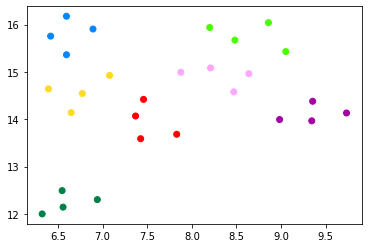

In [21]:
n_utterances = 4
speaker_ids = ["id0000" + str(i) for i in range(1, 8)]
n_speakers = len(speaker_ids)
ground_truth = np.repeat(np.arange(n_speakers), n_utterances)
colors = [colormap[i] for i in ground_truth]
youtube_id = "enrolleng01"
concat = []
for speaker_id in speaker_ids:
    print(f"{speaker_id=}")
    utter_files = speaker_verification.random_utterances(speaker_id, 
                       youtube_id, 
                       n_utterances,
                        mode="enroll")

    centroid, enroll_embeddings = speaker_verification.enroll(speaker_id=speaker_id,
                               youtube_id=youtube_id,
                               utter_files=utter_files,
                               n_utterances=n_utterances,
                               print_mode=False, return_embeddings=True)
    concat.append(enroll_embeddings)

concat_np = concat[0]
for i in range(1, len(concat)):
    concat_np = np.concatenate((concat_np, concat[i]))

reducer = umap.UMAP()
projected = reducer.fit_transform(concat_np)
plt.scatter(projected[:, 0], projected[:, 1], c=colors)